## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autotime

import warnings
warnings.filterwarnings("ignore")

time: 0 ns (started: 2022-10-18 08:55:36 +08:00)


In [2]:
# Read the train data
df_train = pd.read_csv("./data/df_train.csv")
df_train.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,running_position_6,race_id,recent_6_runs,recent_ave_rank,race_distance,HorseWin,HorseRankTop3,HorseRankTop50Percent,jockey_ave_rank,trainer_ave_rank
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,...,NaN,2014-001,1,1.0,1400,1,1,1,6.052910,7.381862
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,...,NaN,2014-001,2,2.0,1400,0,1,1,5.825153,6.611465
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,...,NaN,2014-001,3,3.0,1400,0,1,1,7.857759,6.888713
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,...,NaN,2014-001,4,4.0,1400,0,0,1,4.179172,6.680328
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,...,NaN,2014-001,5,5.0,1400,0,0,1,5.284127,6.903955


time: 109 ms (started: 2022-10-18 08:55:36 +08:00)


In [3]:
# Check the info of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23500 entries, 0 to 23499
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     23500 non-null  int64  
 1   horse_number           23500 non-null  float64
 2   horse_name             23500 non-null  object 
 3   horse_id               23500 non-null  object 
 4   jockey                 23500 non-null  object 
 5   trainer                23500 non-null  object 
 6   actual_weight          23500 non-null  int64  
 7   declared_horse_weight  23500 non-null  int64  
 8   draw                   23500 non-null  int64  
 9   length_behind_winner   23500 non-null  object 
 10  running_position_1     23500 non-null  float64
 11  running_position_2     23500 non-null  float64
 12  running_position_3     23500 non-null  float64
 13  running_position_4     13299 non-null  float64
 14  finish_time            23500 non-null  object 
 15  wi

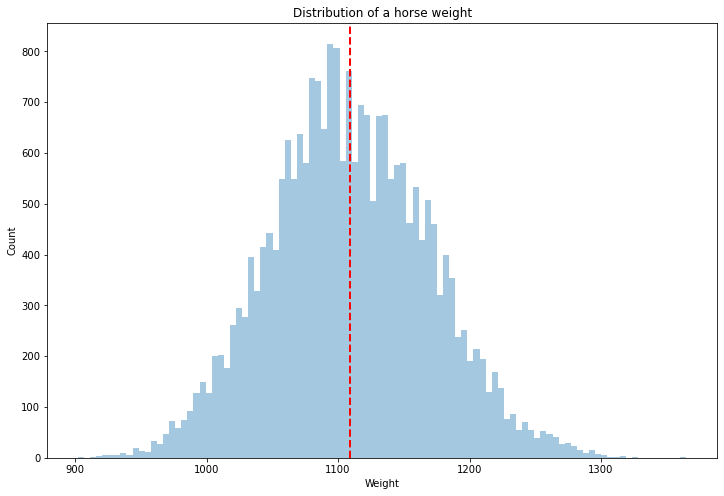

time: 328 ms (started: 2022-10-18 08:55:36 +08:00)


In [4]:
# Draw the mean of a horse weight on same plot
plt.figure(figsize=(12, 8))
sns.distplot(df_train['declared_horse_weight'], bins=100, kde=False)
plt.title("Distribution of a horse weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.axvline(df_train['declared_horse_weight'].mean(), color='r', linestyle='dashed', linewidth=2)

plt.show()


In [5]:
# Find the number of horses each race
numHorsePerRace = df_train.groupby('race_id')['horse_id'].count().value_counts()

time: 0 ns (started: 2022-10-18 08:55:37 +08:00)


Text(0.5, 1.0, 'Distribution of Number of Horses per Race')

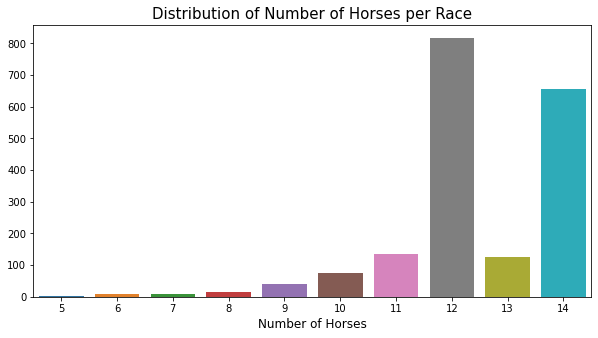

time: 125 ms (started: 2022-10-18 08:55:37 +08:00)


In [6]:
# Plot the distribution of the number of horses
plt.figure(figsize=(10, 5))
sns.barplot(x=numHorsePerRace.index, y=numHorsePerRace.values)
plt.xlabel('Number of Horses', fontsize=12)
plt.ylabel

# Set title
plt.title('Distribution of Number of Horses per Race', fontsize=15)


Text(0.5, 1.0, 'Distribution of Actual Weight')

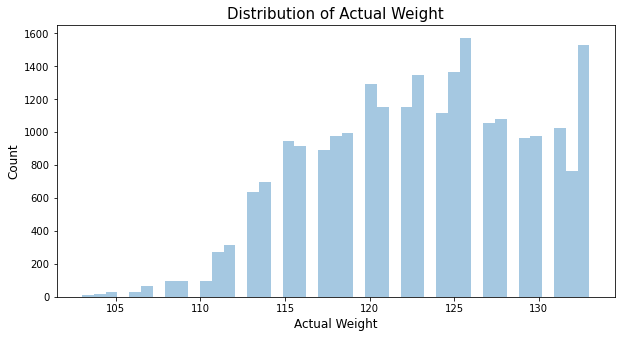

time: 140 ms (started: 2022-10-18 08:55:37 +08:00)


In [7]:
# Plot the distribution of actual weight
plt.figure(figsize=(10, 5))
sns.distplot(df_train['actual_weight'], kde=False)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Actual Weight', fontsize=15)


Text(0.5, 1.0, 'Mean Win Odds against Finishing Position')

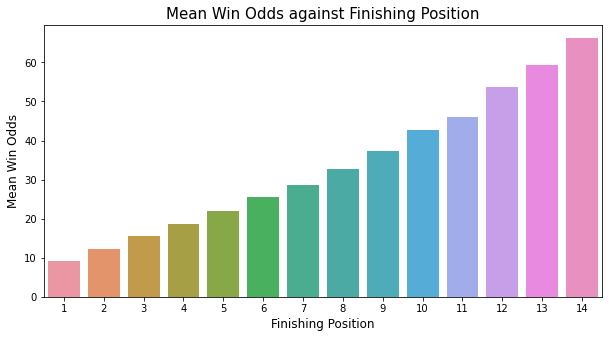

time: 125 ms (started: 2022-10-18 08:55:37 +08:00)


In [8]:
# Plot mean of win odds against finishings
plt.figure(figsize=(10, 5))
sns.barplot(x=df_train['finishing_position'].unique(), y=df_train.groupby('finishing_position')['win_odds'].mean())
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Win Odds', fontsize=12)
plt.title('Mean Win Odds against Finishing Position', fontsize=15)

Text(0.5, 1.0, 'Distribution of Actual Weight against Win Odds')

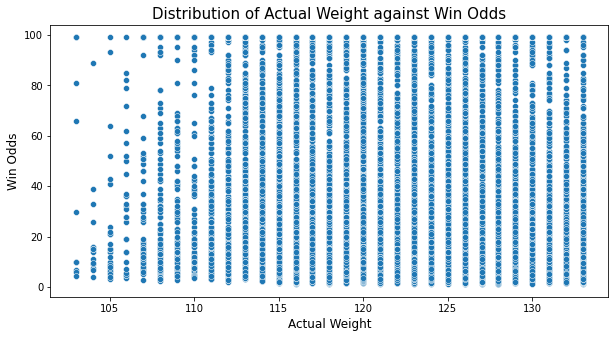

time: 140 ms (started: 2022-10-18 08:55:37 +08:00)


In [9]:
# Plot distribution of actual weight against win odds
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual_weight', y='win_odds', data=df_train)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Win Odds', fontsize=12)
plt.title('Distribution of Actual Weight against Win Odds', fontsize=15)


Text(0.5, 1.0, 'Distribution of Actual Weight against Horse Number')

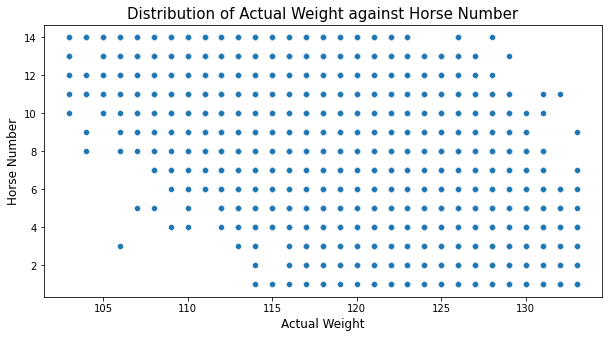

time: 125 ms (started: 2022-10-18 08:55:37 +08:00)


In [10]:
# Plot distribution of actual weight against horse number
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual_weight', y='horse_number', data=df_train)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Horse Number', fontsize=12)
plt.title('Distribution of Actual Weight against Horse Number', fontsize=15)


Hong Kong horse racing uses the handicap system. Horse number #1 has the highest rating and carry the heaviest weight.

Text(0.5, 1.0, 'Distribution of Mean Actual Weight for Each Horse Number')

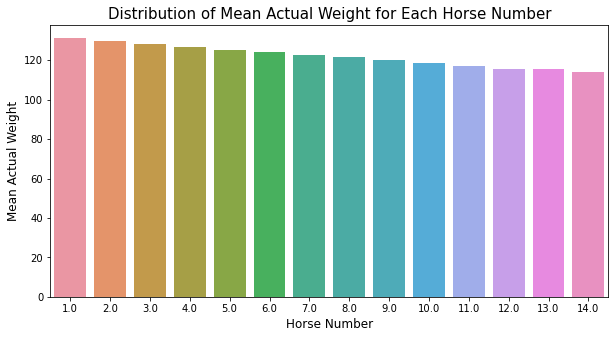

time: 140 ms (started: 2022-10-18 08:55:38 +08:00)


In [11]:
# Find the mean of actual weight for each horse number
meanWtPerHorse = df_train.groupby('horse_number')['actual_weight'].mean()

# Plot the distribution of mean actual weight for each horse number
plt.figure(figsize=(10, 5))
sns.barplot(x=meanWtPerHorse.index, y=meanWtPerHorse.values)
plt.xlabel('Horse Number', fontsize=12)
plt.ylabel('Mean Actual Weight', fontsize=12)
plt.title('Distribution of Mean Actual Weight for Each Horse Number', fontsize=15)



Text(0.5, 1.0, 'Distribution of Finishing Position against Draw')

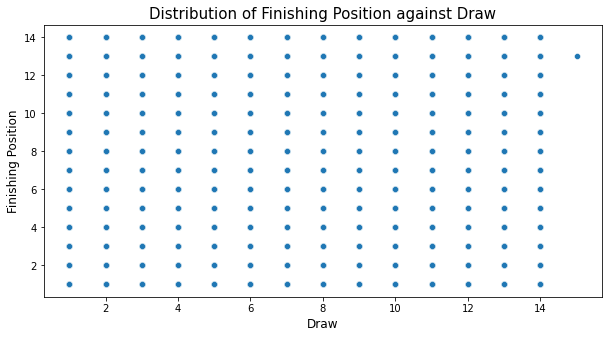

time: 125 ms (started: 2022-10-18 08:55:38 +08:00)


In [12]:
# Plot the distribution of finishing position against draw
plt.figure(figsize=(10, 5))
sns.scatterplot(x='draw', y='finishing_position', data=df_train)
plt.xlabel('Draw', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.title('Distribution of Finishing Position against Draw', fontsize=15)


The gate number for each horse is drawn 2 days before the races. Gate number 1 is the closest to the inside rail. Thus, we would expect better performance for horses with lower draw number.

Text(0.5, 1.0, 'Distribution of Average Finishing Position against Draw')

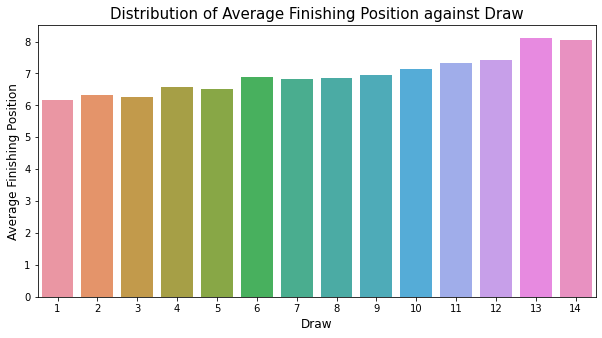

time: 156 ms (started: 2022-10-18 08:55:38 +08:00)


In [13]:
# Return only 14 columns. Draw #15 is not included.
avgPos_vs_Draw = df_train.groupby('draw')['finishing_position'].mean()[:14]

# Plot the distribution of average finishing position against draw
plt.figure(figsize=(10, 5))
sns.barplot(x=avgPos_vs_Draw.index, y=avgPos_vs_Draw.values)
plt.xlabel('Draw', fontsize=12)
plt.ylabel('Average Finishing Position', fontsize=12)
plt.title('Distribution of Average Finishing Position against Draw', fontsize=15)


(1070.0, 1120.0)

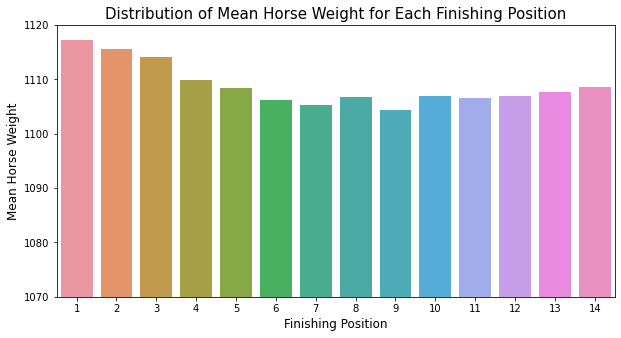

time: 219 ms (started: 2022-10-18 08:55:38 +08:00)


In [14]:
# Find the mean of horse weight for each position
meanHorseWtPerPos = df_train.groupby('finishing_position')['declared_horse_weight'].mean()

# Plot the distribution of mean horse weight for each position
plt.figure(figsize=(10, 5))
sns.barplot(x=meanHorseWtPerPos.index, y=meanHorseWtPerPos.values)
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Horse Weight', fontsize=12)
plt.title('Distribution of Mean Horse Weight for Each Finishing Position', fontsize=15)

# Set y limit
plt.ylim(1070, 1120)


Not conclusive to say that there is a relationship between horse weight and finishing position.

In [16]:
# view df_train
df_train.head()


,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,running_position_6,race_id,recent_6_runs,recent_ave_rank,race_distance,HorseWin,HorseRankTop3,HorseRankTop50Percent,jockey_ave_rank,trainer_ave_rank
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,...,NaN,2014-001,1,1.0,1400,1,1,1,6.052910,7.381862
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,...,NaN,2014-001,2,2.0,1400,0,1,1,5.825153,6.611465
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,...,NaN,2014-001,3,3.0,1400,0,1,1,7.857759,6.888713
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,...,NaN,2014-001,4,4.0,1400,0,0,1,4.179172,6.680328
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,...,NaN,2014-001,5,5.0,1400,0,0,1,5.284127,6.903955


time: 31 ms (started: 2022-10-18 08:56:03 +08:00)


Text(0.5, 1.0, 'Correlation Matrix')

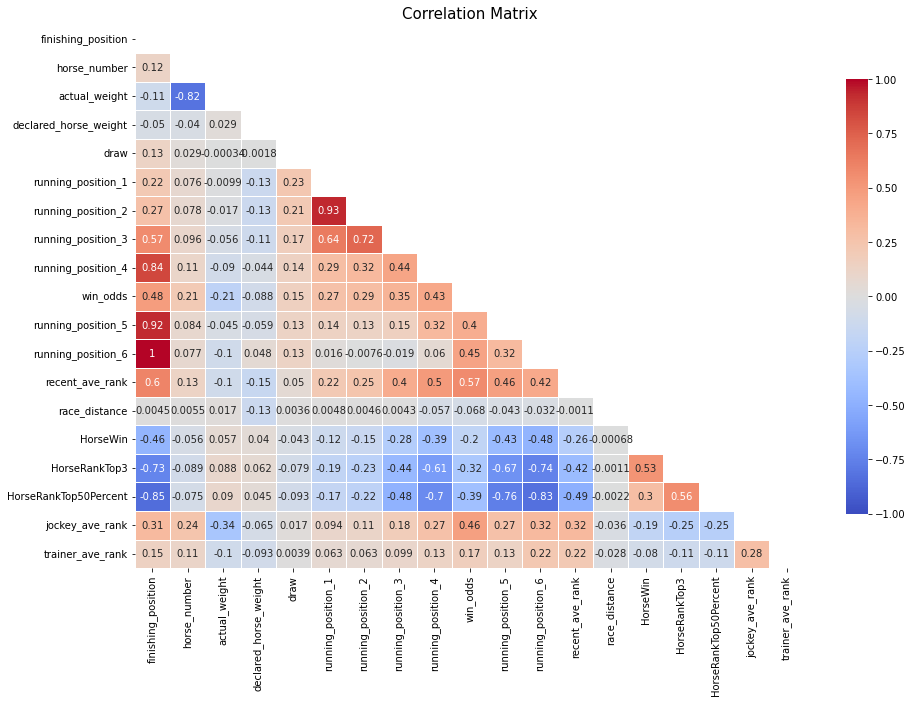

time: 812 ms (started: 2022-10-18 08:59:41 +08:00)


In [27]:
# view the correlation matrix
corr = df_train.corr()

# do a mask to hide the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, 
            center=0, square=False, linewidths=.5, 
            cbar_kws={"shrink": .8}, annot=True)
plt.title('Correlation Matrix', fontsize=15)



## Find the best jockey

In [52]:
# Find out how many jockeys are there
print("There are {} jockeys in the dataset.".format(len(df_train['jockey'].unique())))

There are 99 jockeys in the dataset.
time: 0 ns (started: 2022-10-18 10:50:20 +08:00)


In [33]:
# Finding the number of wins per jockey
jockeyWins = df_train.groupby('jockey')['finishing_position'].apply(lambda x: (x==1).sum())

# Finding the win rate per jockey
jockeyWinRate = df_train.groupby('jockey')['HorseWin'].mean()

time: 31 ms (started: 2022-10-18 10:40:02 +08:00)


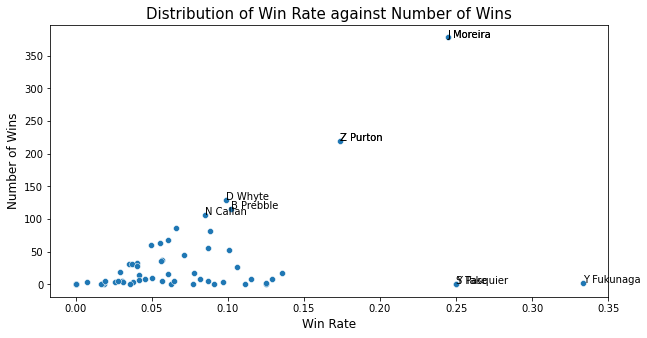

time: 188 ms (started: 2022-10-18 10:43:45 +08:00)


In [42]:
# Plot win rate against number of wins
plt.figure(figsize=(10, 5))
sns.scatterplot(x=jockeyWinRate, y=jockeyWins)
plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Distribution of Win Rate against Number of Wins', fontsize=15)

# Annotate the top 5 jockeys with the most wins
for i in jockeyWins.sort_values(ascending=False)[:5].index:
    plt.annotate(i, (jockeyWinRate[i], jockeyWins[i]))

# Annotation for the top 5 jockeys with the highest win rate
for i in jockeyWinRate.sort_values(ascending=False)[:5].index:
    plt.annotate(i, (jockeyWinRate[i], jockeyWins[i]))
    



Text(0.5, 1.0, 'Distribution of Jockey Frequency')

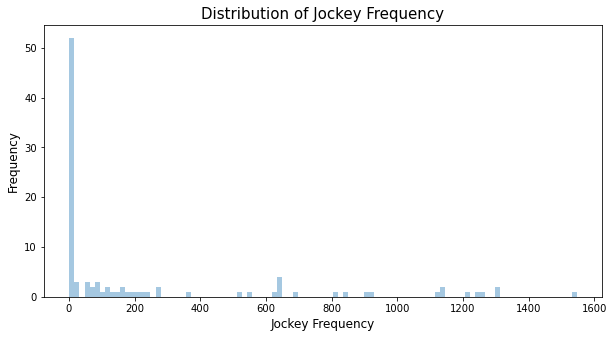

time: 219 ms (started: 2022-10-18 11:00:13 +08:00)


In [73]:
# Find the frequency of each jockey
jockeyFreq = df_train['jockey'].value_counts()

# Plot histogram of jockey frequency
plt.figure(figsize=(10, 5))
sns.distplot(jockeyFreq, kde=False, bins=100)
plt.xlabel('Jockey Frequency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Jockey Frequency', fontsize=15)

## Find the best trainer

In [49]:
# Find out how many trainers are there
print('Number of trainers: ', len(df_train['trainer'].unique()))

Number of trainers:  87
time: 16 ms (started: 2022-10-18 10:49:30 +08:00)


In [44]:
# Find the number of wins per trainer
trainerWins = df_train.groupby('trainer')['finishing_position'].apply(lambda x: (x==1).sum())

# Find the win rate per trainer
trainerWinRate = df_train.groupby('trainer')['HorseWin'].mean()

time: 16 ms (started: 2022-10-18 10:45:41 +08:00)


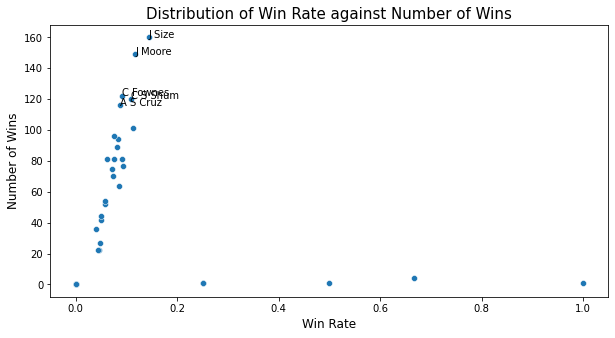

time: 156 ms (started: 2022-10-18 10:46:37 +08:00)


In [46]:
# Plot win rate against number of wins
plt.figure(figsize=(10, 5))
sns.scatterplot(x=trainerWinRate, y=trainerWins)
plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Distribution of Win Rate against Number of Wins', fontsize=15)

# Annotate the top 5 trainers with the most wins
for i in trainerWins.sort_values(ascending=False)[:5].index:
    plt.annotate(i, (trainerWinRate[i], trainerWins[i]))

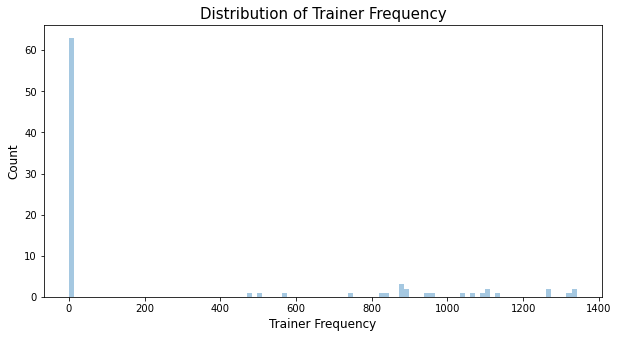

time: 407 ms (started: 2022-10-18 10:58:20 +08:00)


In [69]:
# Find the frequency of each trainer
trainerFreq = df_train['trainer'].value_counts()

# Plot the distribution of trainer frequency
plt.figure(figsize=(10, 5))
sns.distplot(trainerFreq, kde=False, bins=100)
plt.xlabel('Trainer Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Trainer Frequency', fontsize=15);

In [64]:
trainerFreq

C Fownes       1341
A S Cruz       1340
C H Yip        1324
Y S Tsui       1267
J Moore        1265
               ... 
W A Ward          1
R Hannon          1
D O'Meara         1
E Mader           1
K Yoshimura       1
Name: trainer, Length: 87, dtype: int64

time: 0 ns (started: 2022-10-18 10:57:26 +08:00)


## Find the best horse

In [51]:
# Find out how many horses are there
print('Number of horses: ', len(df_train['horse_id'].unique()))

Number of horses:  1907
time: 16 ms (started: 2022-10-18 10:50:01 +08:00)


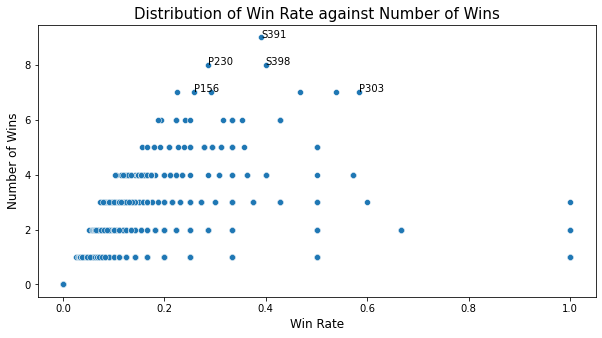

time: 297 ms (started: 2022-10-18 10:48:23 +08:00)


In [48]:
# Find the number of wins per horse
horseWins = df_train.groupby('horse_id')['finishing_position'].apply(lambda x: (x==1).sum())

# Find the win rate per horse
horseWinRate = df_train.groupby('horse_id')['HorseWin'].mean()

# Plot win rate against number of wins
plt.figure(figsize=(10, 5))
sns.scatterplot(x=horseWinRate, y=horseWins)
plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Distribution of Win Rate against Number of Wins', fontsize=15)

# Annotate the top 5 horses with the most wins
for i in horseWins.sort_values(ascending=False)[:5].index:
# fi    plt.annotate(i, (horseWinRate[i], horseWins[i]))

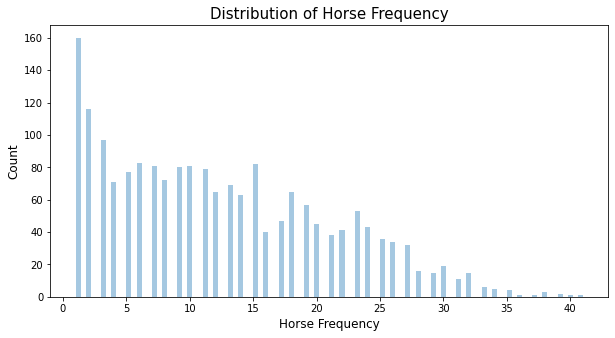

time: 187 ms (started: 2022-10-18 11:01:18 +08:00)


In [75]:
# Find the frequency of each horse
horseFreq = df_train['horse_id'].value_counts()

# Plot the distribution of horse frequency
plt.figure(figsize=(10, 5))
sns.distplot(horseFreq, kde=False, bins=100)
plt.xlabel('Horse Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Horse Frequency', fontsize=15);
